# **Loading the Credit Card Data Set**

* Import all of the dependencies and set global parameters.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8

In [2]:
from google.colab import files
uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [3]:
data_path = "creditcard.csv"
df = pd.read_csv(data_path)

* Look at its contents in this data frame.

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Look at some basic statistical values relating to the values in
this data frame.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


 * Check the shape of the data frame.

In [6]:
df.shape

(284807, 31)

# **Normal Data and Fraudulent Data**

* There are only two classes in this data frame, normal and fraud, let’s split up the data frame by class and continue with the data analysis. 
* In the context of anomaly detection, the fraud class is also the anomaly class.

In [7]:
anomalies = df[df.Class == 1]
normal = df[df.Class == 0]

In [8]:
print(f"Anomalies: {anomalies.shape}")
print(f"Normal: {normal.shape}")

Anomalies: (492, 31)
Normal: (284315, 31)


* Look at this disparity in a graphical manner just to see how
large the difference is.

Text(0, 0.5, 'Counts')

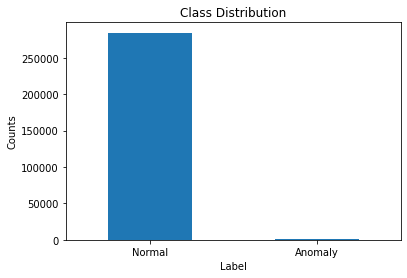

In [9]:
class_counts = pd.value_counts(df['Class'], sort = True)
class_counts.plot(kind = 'bar', rot=0)
plt.title("Class Distribution")
plt.xticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Label")
plt.ylabel("Counts")

* Look at some statistical summary values for *Amount*

In [10]:
anomalies.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

* Look at the normal data, it’s even more skewed right than the
anomalies. 

* Most of the transactions are below $100.

* Some of the amounts can get very high to values like $25,000.



# **Plotting**

*  Define some functions to help plot the various columns of the
data to make it much easier to visualize the various relationships.

In [12]:
def plot_histogram(df, bins, column, log_scale=False):
  bins = 100
  anomalies = df[df.Class == 1]
  normal = df[df.Class == 0]
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
  fig.suptitle(f'Counts of {column} by Class')
  ax1.hist(anomalies[column], bins = bins, color="red")
  ax1.set_title('Anomaly')
  ax2.hist(normal[column], bins = bins, color="orange")
  ax2.set_title('Normal')
  plt.xlabel(f'{column}')
  plt.ylabel('Count')
  if log_scale:
    plt.yscale('log')
  plt.xlim((np.min(df[column]), np.max(df[column])))
  plt.show()

In [13]:
def plot_scatter(df, x_col, y_col, sharey = False):
  anomalies = df[df.Class == 1]
  normal = df[df.Class == 0]
  fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                                 sharey=sharey)
  fig.suptitle(f'{y_col} over {x_col} by Class')
  ax1.scatter(anomalies[x_col], anomalies[y_col], color='red')
  ax1.set_title('Anomaly')
  ax2.scatter(normal[x_col], normal[y_col], color='orange')
  ax2.set_title('Normal')
  plt.xlabel(x_col)
  plt.ylabel(y_col)
  plt.show()

* Plot values for *Amount* by Class for the entire data frame.

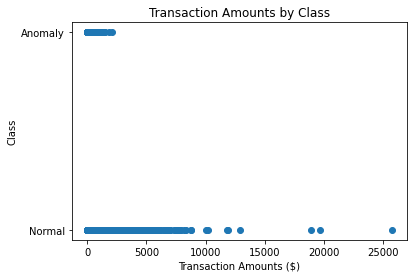

In [14]:
plt.scatter(df.Amount, df.Class)
plt.title("Transaction Amounts by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Transaction Amounts ($)")
plt.show()

* It seems like there are some massive outliers in the normal data set.
* The upper graph isn’t very informative to value counts.

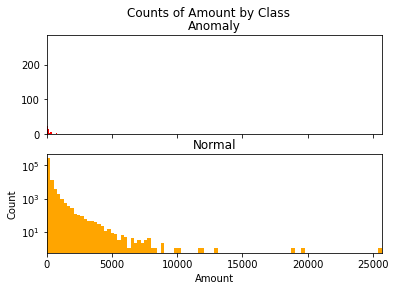

In [15]:
bins = 100
plot_histogram(df, bins, "Amount", log_scale=True)

* Notice a right skew as well as the massive outliers present in the normal data from the upper graph.

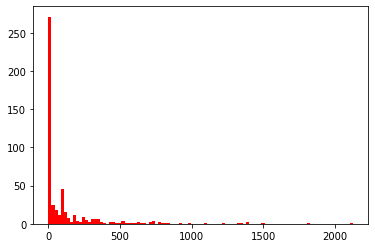

In [16]:
plt.hist(anomalies.Amount, bins = bins, color="red")
plt.show()

* The anomalies seem to be right skewed as well, but much more heavily
so. 
* This means that the majority of anomalous transactions actually have
quite low transaction amounts.

* Plot values for *Time* by Class for the entire data frame.

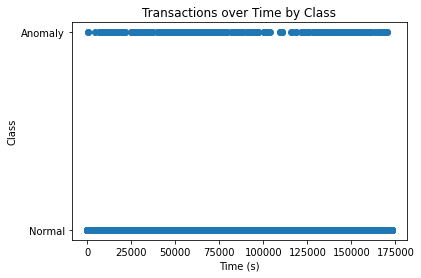

In [17]:
plt.scatter(df.Time, df.Class)
plt.title("Transactions over Time by Class")
plt.ylabel("Class")
plt.yticks(range(2), ["Normal", "Anomaly"])
plt.xlabel("Time (s)")
plt.show()

* This graph isn’t very informative, but it shows that fraudulent
transactions are pretty spread out over the entire timeline. 
* Use the plotter functions to get an idea of the counts.

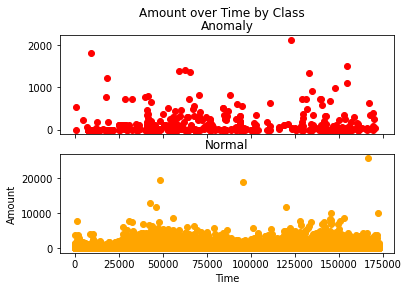

In [18]:
plot_scatter(df, "Time", "Amount")

* Look at the histogram to take into account frequencies.

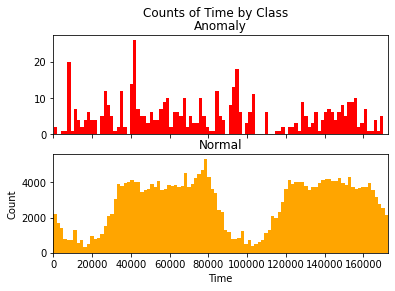

In [20]:
plot_histogram(df, bins, "Time")

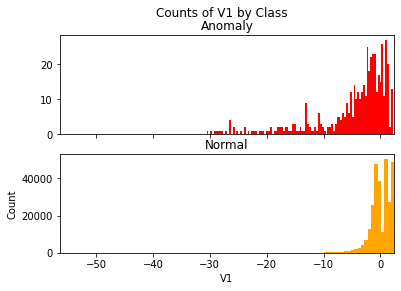

In [21]:
plot_histogram(df, bins, "V1")

* Look at how the values for Amount relate to V1.

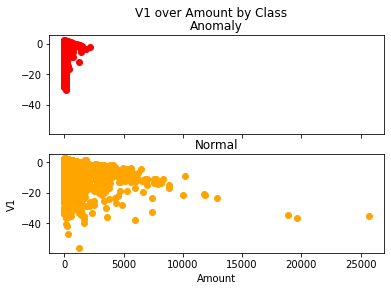

In [22]:
plot_scatter(df, "Amount", "V1", sharey=True)

* From the upper graph, the fraudulent points don’t seem out of place
compared to all of the other normal points.

* Look at how time relates to the values for V1.

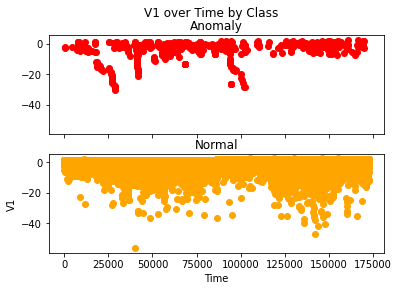

In [23]:
plot_scatter(df, "Time", "V1", sharey=True)

* Plot all of the frequency counts for each column from V1 to V28.

V1 Counts


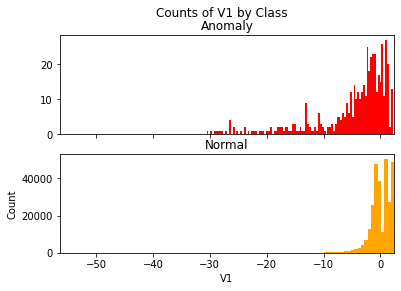

V2 Counts


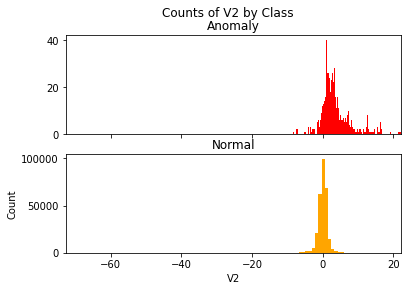

V3 Counts


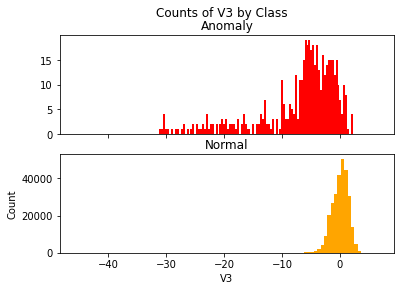

V4 Counts


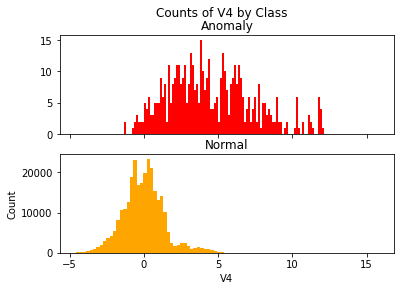

V5 Counts


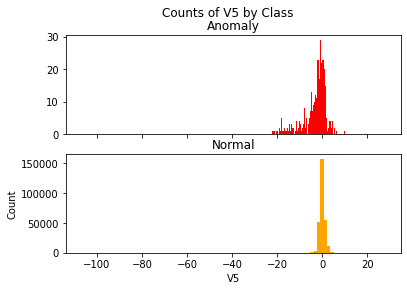

V6 Counts


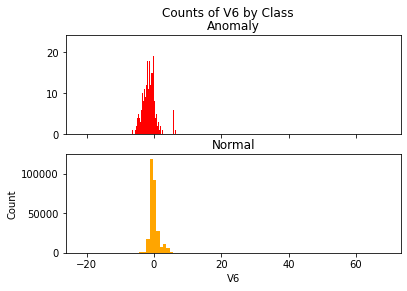

V7 Counts


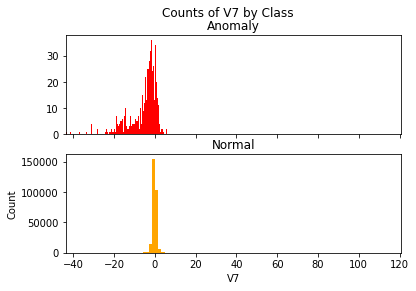

V8 Counts


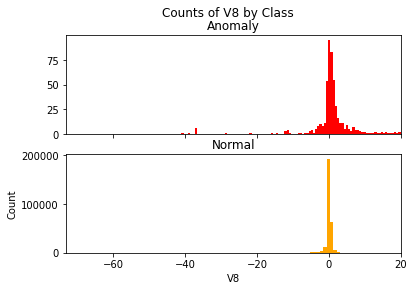

V9 Counts


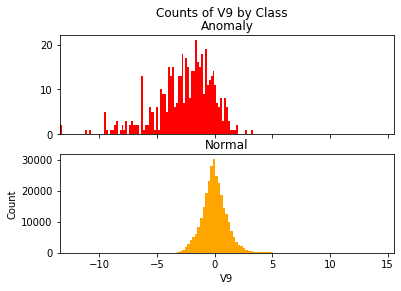

V10 Counts


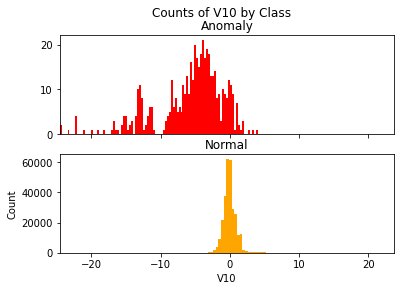

V11 Counts


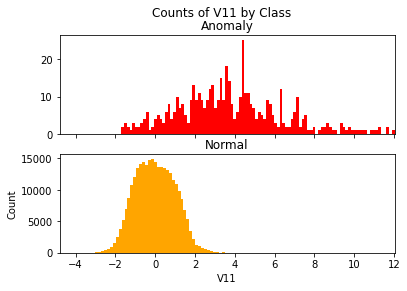

V12 Counts


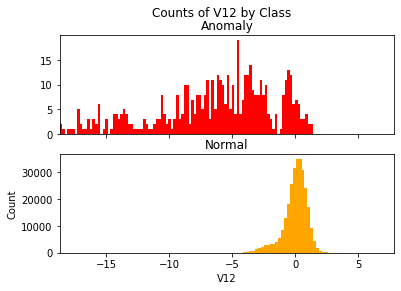

V13 Counts


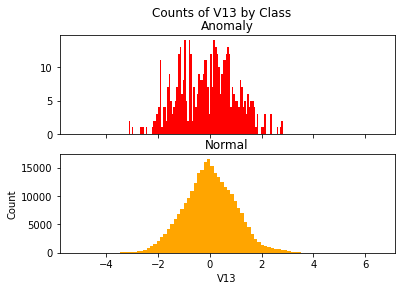

V14 Counts


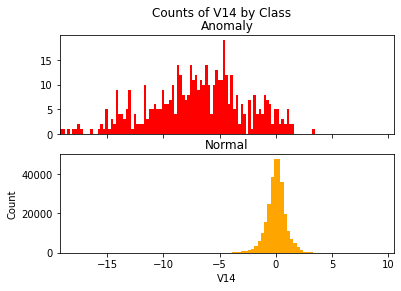

V15 Counts


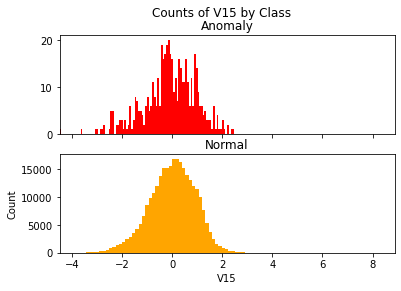

V16 Counts


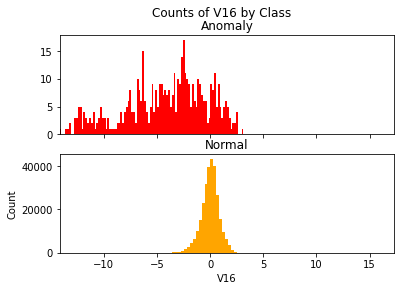

V17 Counts


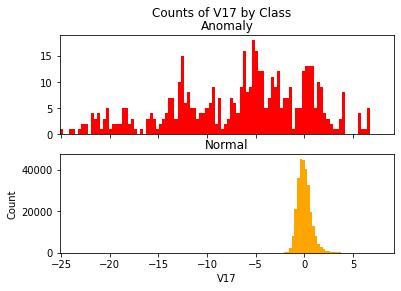

V18 Counts


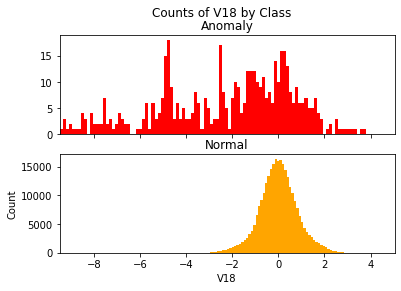

V19 Counts


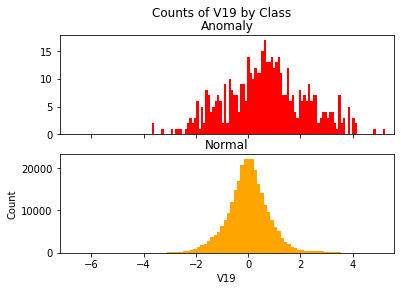

V20 Counts


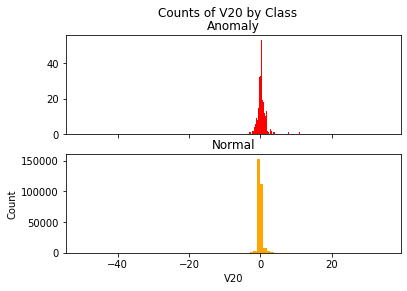

V21 Counts


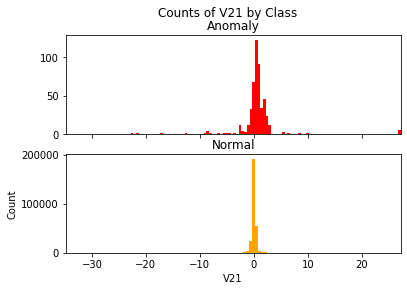

V22 Counts


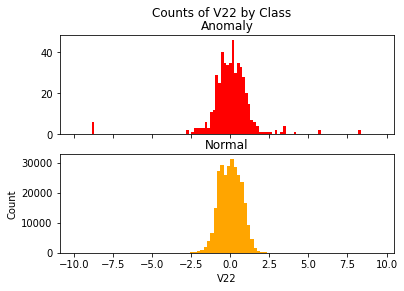

V23 Counts


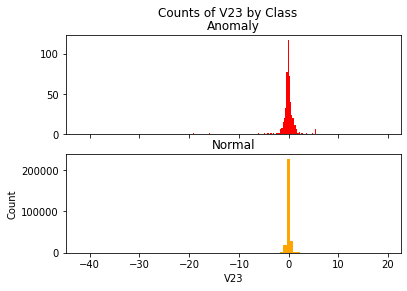

V24 Counts


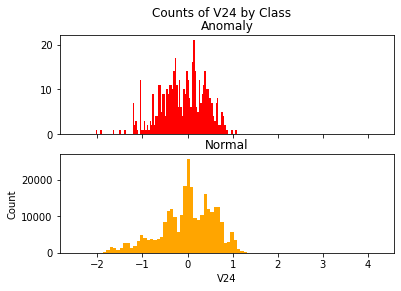

V25 Counts


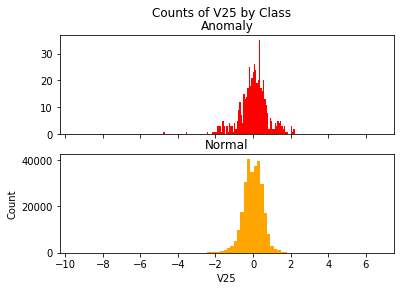

V26 Counts


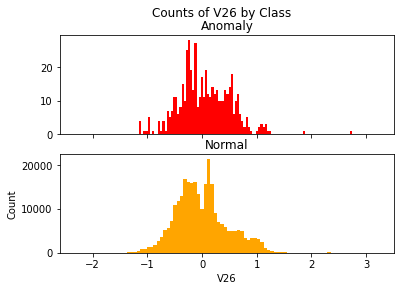

V27 Counts


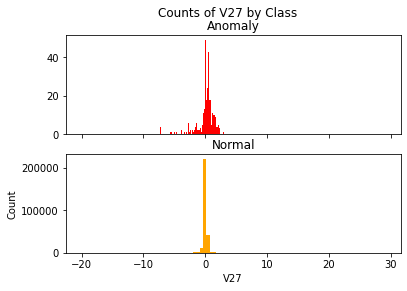

V28 Counts


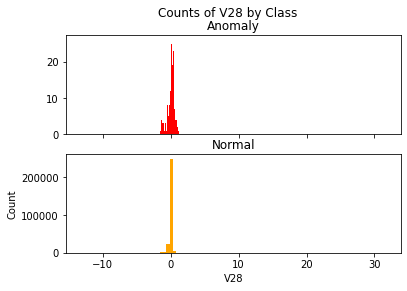

In [24]:
for f in range(1, 29):
  print(f'V{f} Counts')
  plot_histogram(df, bins, f'V{f}')

* Look at how all of these data points vary according to time.

V1 vs Time


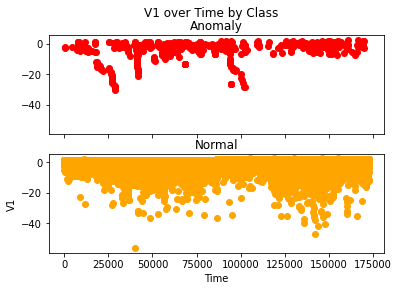

V2 vs Time


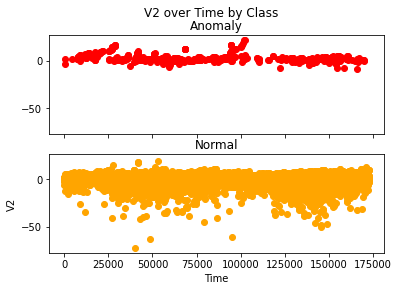

V3 vs Time


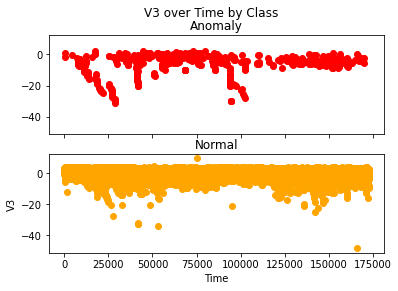

V4 vs Time


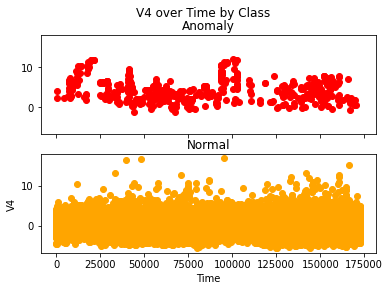

V5 vs Time


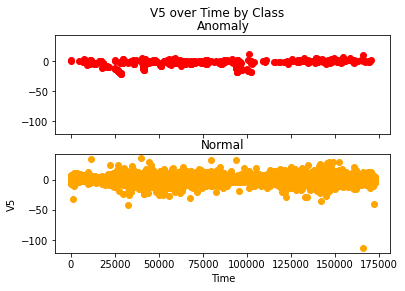

V6 vs Time


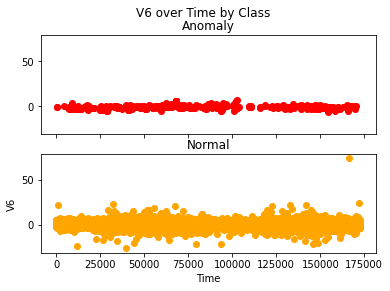

V7 vs Time


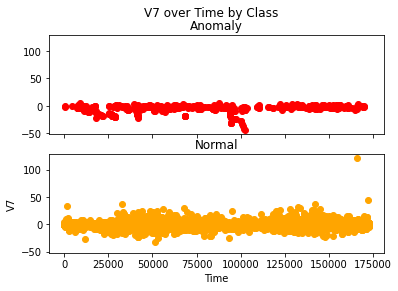

V8 vs Time


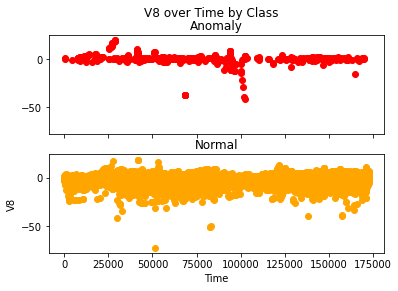

V9 vs Time


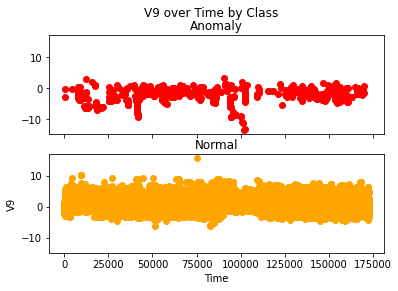

V10 vs Time


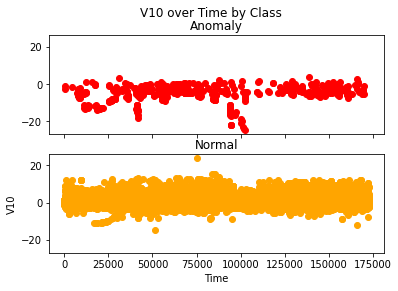

V11 vs Time


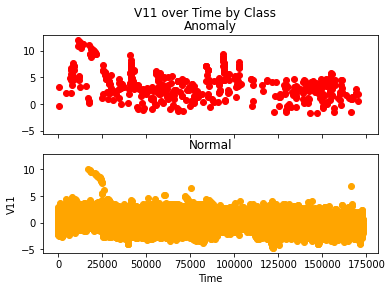

V12 vs Time


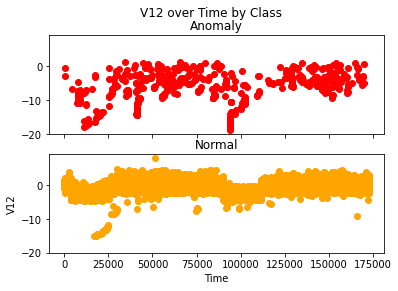

V13 vs Time


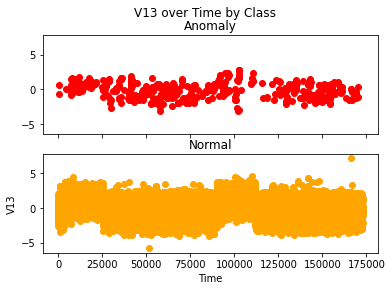

V14 vs Time


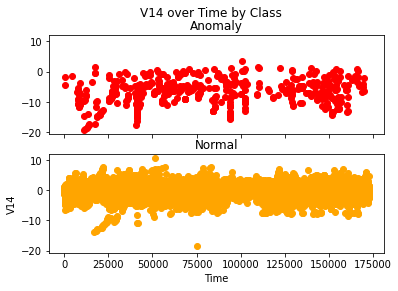

V15 vs Time


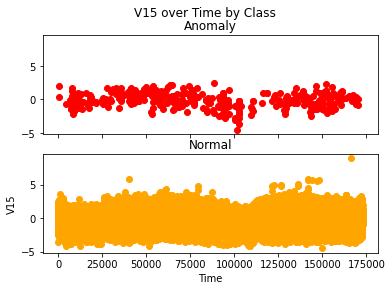

V16 vs Time


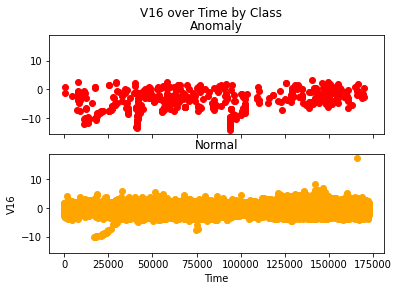

V17 vs Time


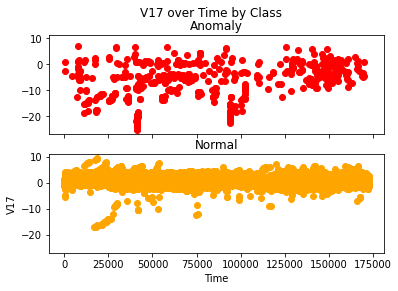

V18 vs Time


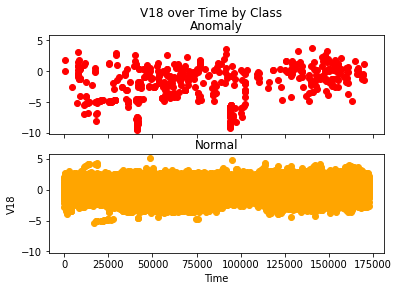

V19 vs Time


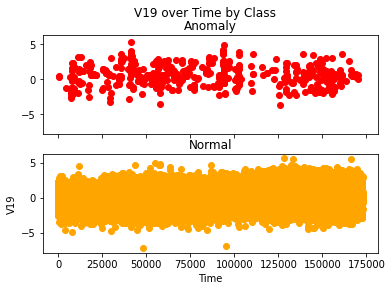

V20 vs Time


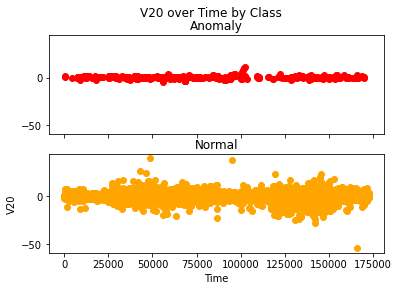

V21 vs Time


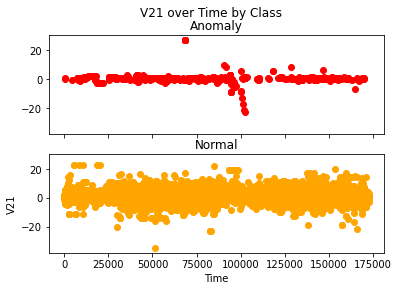

V22 vs Time


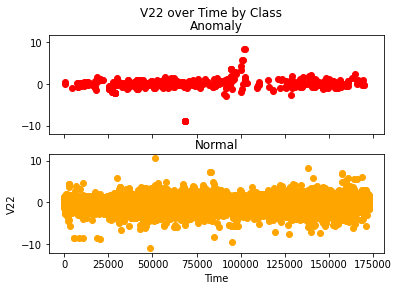

V23 vs Time


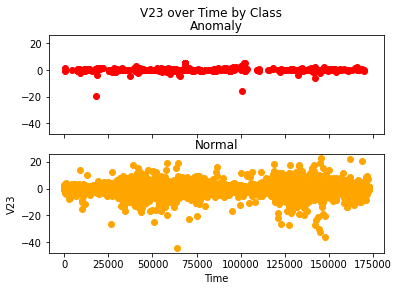

V24 vs Time


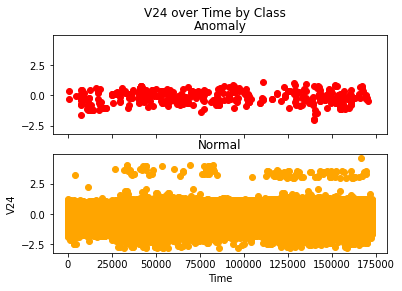

V25 vs Time


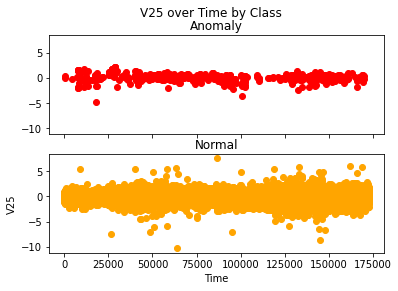

V26 vs Time


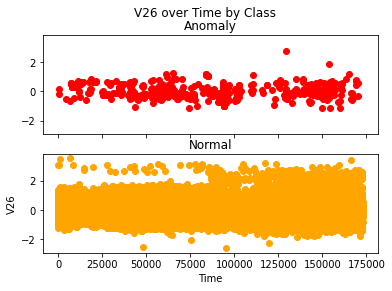

V27 vs Time


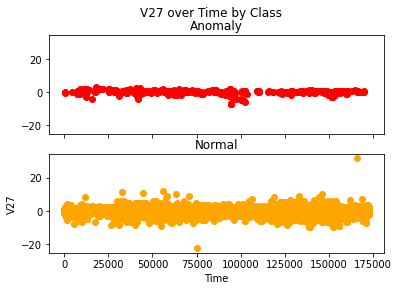

V28 vs Time


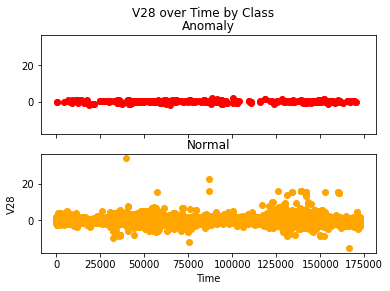

In [25]:
for f in range(1, 29):
  print(f'V{f} vs Time')
  plot_scatter(df, "Time", f'V{f}', sharey=True)

* Once again, with V12 you can see a significant difference between the
anomalies and the normal data points. 
* A good portion of the anomalies remain hidden within the normal data points, but a significant amount of them can be differentiated from the rest.

* The difference between the anomalies and the normal points are
highlighted even further when looking at V17. 
* It seems that even in relation to time, columns V12 and V17 hold data that best help distinguish fraudulent transactions from normal transactions. 

* Look the relationship between each of these columns and *Amount*.

Amount vs V1


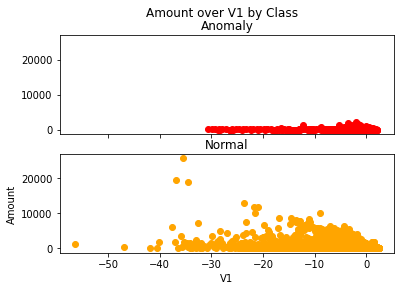

Amount vs V2


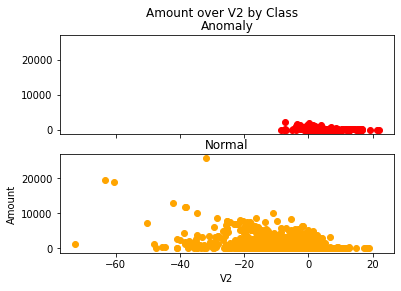

Amount vs V3


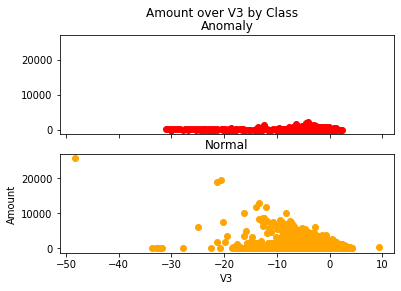

Amount vs V4


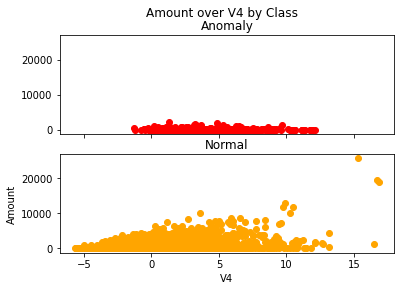

Amount vs V5


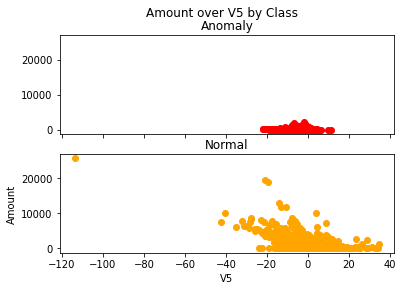

Amount vs V6


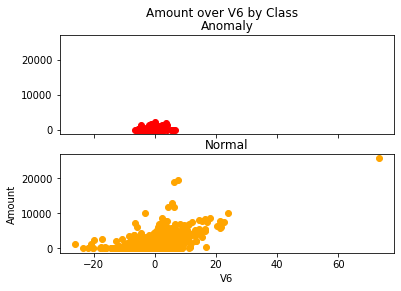

Amount vs V7


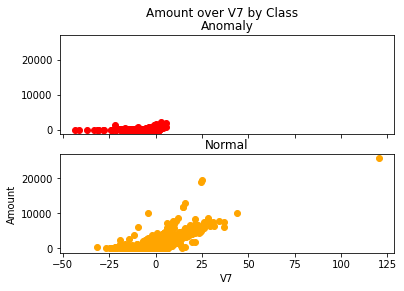

Amount vs V8


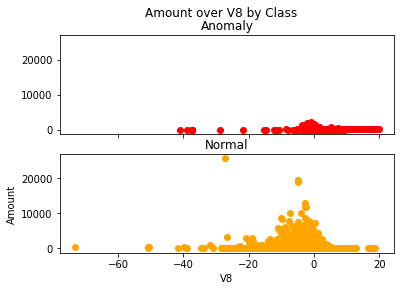

Amount vs V9


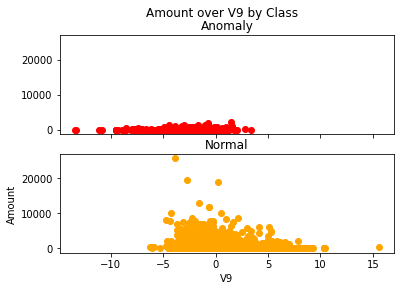

Amount vs V10


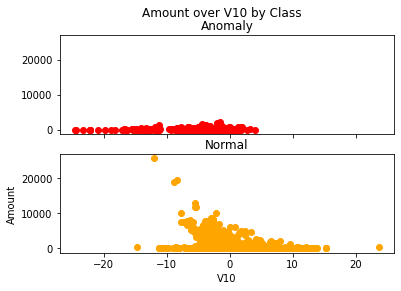

Amount vs V11


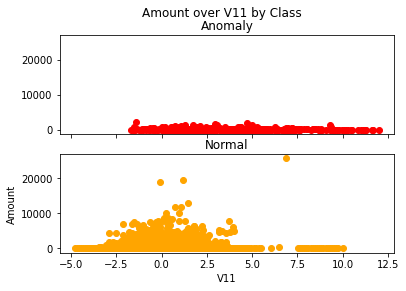

Amount vs V12


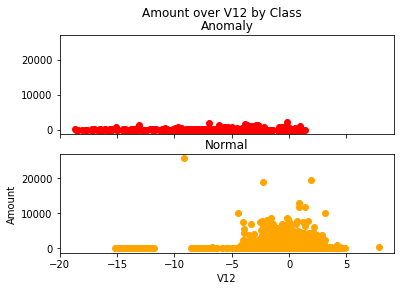

Amount vs V13


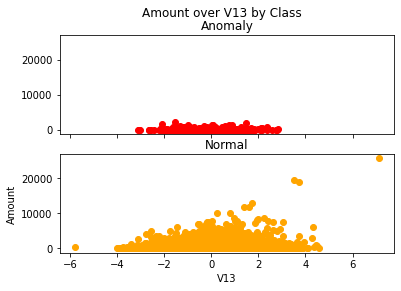

Amount vs V14


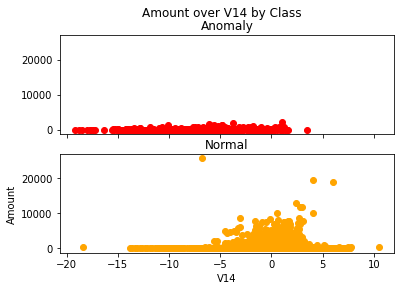

Amount vs V15


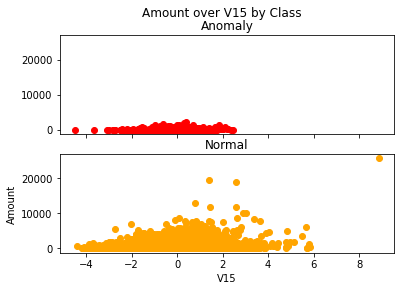

Amount vs V16


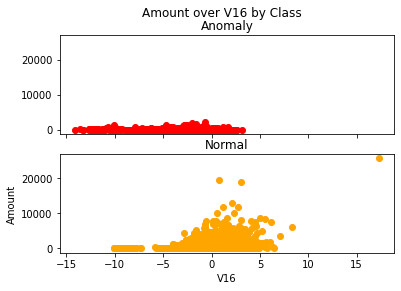

Amount vs V17


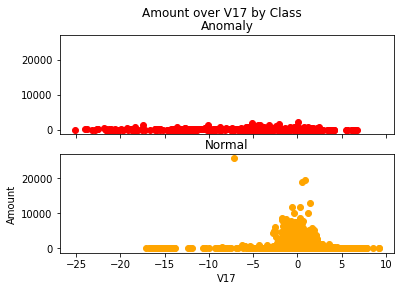

Amount vs V18


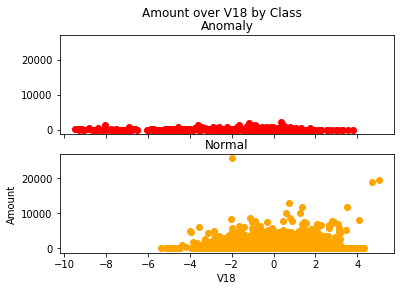

Amount vs V19


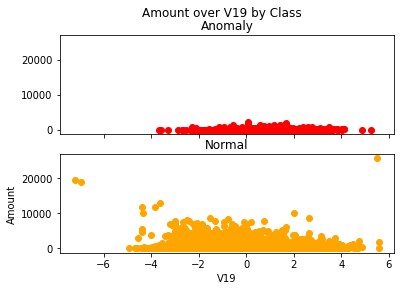

Amount vs V20


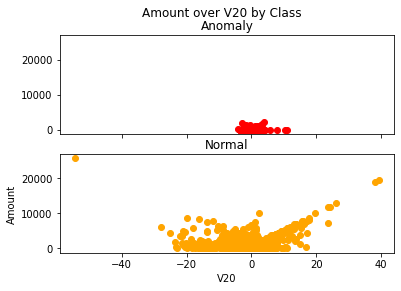

Amount vs V21


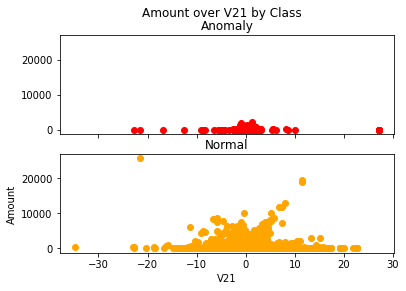

Amount vs V22


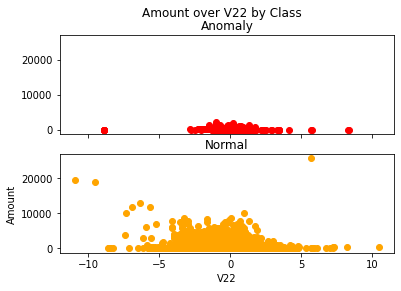

Amount vs V23


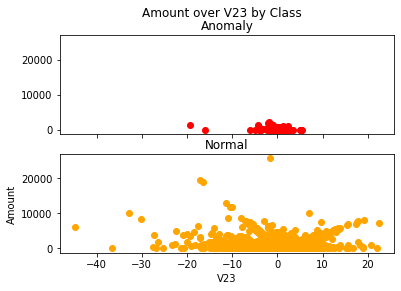

Amount vs V24


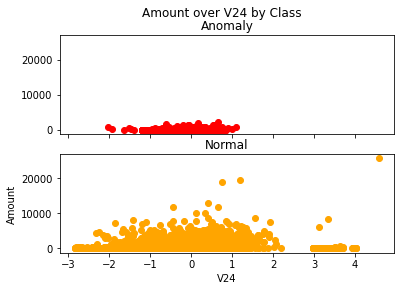

Amount vs V25


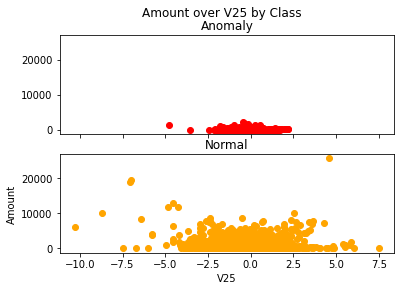

Amount vs V26


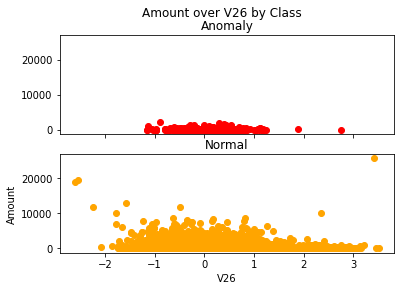

Amount vs V27


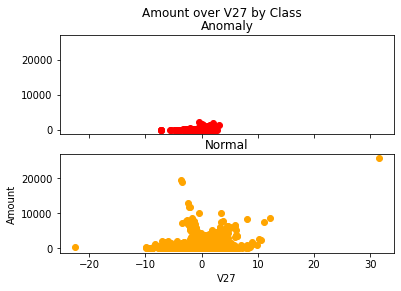

Amount vs V28


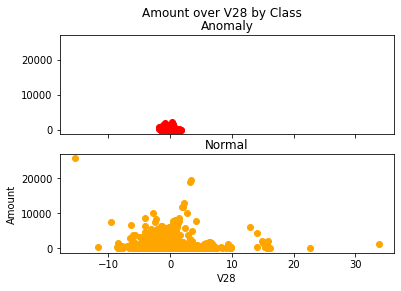

In [26]:
for f in range(1, 29):
  print(f'Amount vs V{f}')
  plot_scatter(df, f'V{f}', "Amount", sharey=True)

* This time there seems to be a few more graphs more clearly showing
the differences between the normal and fraudulent points. 